### Ecuación de difusión para espacios arbitrarios 2D. Diferencias finitas

El interés de este trabajo es generar un algoritmo que permita calcular la difusión de contaminantes en espacios arbitrarios, en particular en una \textbf{red de calles} y utilizando autos o \textbf{agentes moviles} como emisores de contaminantes. Resulta que el comportamiento de las particulas contaminantes en el aire sigue el movimiento browniano, mismo que es modelado con la ecuación de difusión.

Así la ecuación de difusión es una PDE (ecuación diferencial parcial) que describe fluctuaciones de densidad en un material que se difunde. También se usa para calcular procesos que exhiben un comportamiento de difusión como lo puede ser la propagación de temperatura en un metal. 
La ecuación no homogénea, que describe el comportamiento de fuentes (de calor o de contaminantes) descritas por $Q(x,t)$, está dada por:

$$
    \frac{\partial U}{\partial t} = D\nabla^2 U + Q(x,t)
$$

Con x en $R^n$ y $\nabla^2 = \sum _{ i=1 }^{ n }{  \frac{\partial ^2 U}{\partial x_i^2} }$

En 2D La discretiación con diferencias centradas en espacio y paso adelante en el tiempo, nos da como resultado la siguiente ecuación:

$$
    U^{n+1}_{i,j} = Dh\left[ \frac{U^{n}_{i,j+1} - 2U^{n}_{i,j} + U^{n}_{i,j-1}}{k^2} + \frac{U^{n}_{i+1,j} - 2U^{n}_{i,j} + U^{n}_{i-1,j}}{l^2} \right] + hQ_{i,j} + U^n_{i,j}
$$

Con: $$ \Delta t= h \\
\Delta x = k \\
\Delta y = l$$

y la condición de estabilidad es:

$$ h \le \frac{k^2l^2}{2D(k^2+l^2)}$$

El esquema de cálculos puede representarse de la siguiente forma:

<img src="stencil_1.png">


## Condiciones de frontera

Los problemas sujetos a condiciones iniciales y/o de frontera son llamados problemas de valores de frontera (BVP) cumplen existencia y unicidad de una solución, la cual no necesariamente es estable. Al tener una función de la forma $u \equiv u(\textbf{x}, t)$ definida en el dominio $\Omega$ y $x \in {R}^n$; las condiciones más comunes son:

Condiciones iniciales 
    $$ u(\textbf{x}, t) = f(\textbf{x})$$
    para toda $\textbf{x} \in \Omega$
    
Condiciones de frontera Dirichlet
    
$$ u(\textbf{x}, t) = g(\textbf{x}, t) $$
    
para toda $\textbf{x} \in \partial\Omega$. Especifica el valor de la función $u$ en la frontera del dominio $\Omega$. La función $g$ puede no depender del tiempo e incluso ser constante.
    
Condiciones de frontera Neumann
    
$$ \frac{\partial u}{\partial n}(\textbf{x} , t)= \vec { n } \cdot \nabla u = g(\textbf{x}, t)$$
    
para toda $\textbf{x} \in \partial\Omega$. El vector $\vec{n}(\textbf{x})$, indica el vector exterior normal a la superficie en el punto $\textbf{x}$.

<img src="espacio_omega.png">
    
Condiciones de frontera Robin
    
$$\alpha u(\textbf{x}, t) + \beta \frac{\partial u}{\partial n}(\textbf{x} , t) = g(\textbf{x}, t)$$
    
para toda $\textbf{x} \in \partial\Omega$. Usualmente $\alpha$ y $\beta$ son constantes, en dado caso es una combinación lineal de las condiciones Dirichlet y Neuman.

Condiciones de frontera periódicas.

Normalmente se usan en problemas que tienen características que se repitan en el dominio de pequeña parte que genera todo el espacio (celda unitaria). Ejemplos 1D en un dominio espacial $[a,b]$, serían:

$$u(a,t) = u(b,t)$$

o
$$\frac{\partial u}{\partial x}(a , t) = \frac{\partial u}{\partial x}(b , t)$$

Estos argumento se extienden fácilmente a una función en $R^n$ y en general se puede añadir cualquier término que dependa de las derivadas parciales.

Existe gran cantidad de algoritmos con base en distintos métodos numéricos que permíten el cálculo de la ecuación de difusión, sin embargo no permiten la inclusión de las fuentes móviles, ni de la modificación de los tipos de frontera. Este algoritmo permite identificar el tipo de frontera y sus características.

## Paredes absorbentes y reflejantes

De acuerdo a las condiciones Neumann 2-dimensional, en un segmento de frontera, cuya normal es la dirección $x$:

$$\frac{\partial u}{\partial x} = \alpha$$

para $\alpha = 0$ se tienen paredes totalmente reflejantes. Sin embargo, considerando paredes que simulan los edificios en las calles, no hay fronteras 100% reflejantes si no parte reflejantes y parte absorbentes. Sin realizar los cálculos de difusión fuera del espacio $\Omega$, es posible describir esta característica desde la ecuación anterior mediante diferencias centradas como:
$$\Rightarrow$$\
$$u_{i+1} = \alpha2 \Delta x + u_{i-1} = u_{i-1}(1-\beta) = u_{i-1}R$$

$R$ y $\beta$  corresponde al coeficiente de reflexión y absorción respectivamente.

<img src="stencil_2.png">

Observemos que los nodos en la frontera no pueden ser calculados cuando  se tienen fronteras tipo Neumann ya que nodos vecinos se encuentran en el exterior de $\Omega$. En la imagen, el nodo esta señalado por un asterisco y se puede aproximar el valor "imaginario" en dicho nodo  con la fórmula anterior.

## Fuciones auxiliares

In [1]:
#Crea un arreglo del intervalo [a,b] dividido en n partes iguales

function linspace(a,b,n)
    range(a,stop=b,length=n)
end

linspace (generic function with 1 method)

In [3]:
#rodear(A,a), rodea la matriz A de números a
function rodear(A,a)
    M,N = size(A)
    B = a*ones(M+2,N+2)
    B[2:M+1,2:N+1] = A
    return B
end

rodear (generic function with 1 method)

Consideremos que trabajamos en un dominio $\Omega$, cada nodo estará descrito por:
    $$
    \Omega_{i,j} =\begin{cases} 
    0\quad if\quad { \Omega  }_{ i,j }\notin \Omega  \\ 
    0\quad if\quad { \Omega  }_{ i,j }\in \partial \Omega (Dirichlet) \\ 
    1\quad if\quad { \Omega  }_{ i,j }\in int(\Omega ) \\ 
    2\quad if\quad { \Omega  }_{ i,j }\in \partial \Omega (Neumann)  \\
    3\quad if\quad { \Omega  }_{ i,j }\in \partial \Omega (Periodica) 
    \end{cases} 
    $$
    
De acuerdo a este criterio se definen las siguientes funciones:

In [4]:
#id_normal(), identifica el vector normal exterior de un punto Ω_ij que esta en ∂Ω,
#de acuerdo a la clasificación de nodos de Ω

function id_normal(Ω,i,j)
    a = [Ω[i,j-1] Ω[i,j+1] Ω[i-1,j] Ω[i+1,j]]
    
    if     a == [0 1 2 2]
        n = [-1 0]
    elseif a == [1 0 2 2]
        n = [1 0]
    elseif a == [2 2 1 0]
        n = [0 -1]
    elseif a == [2 2 0 1]
        n = [0 1]
    elseif a == [0 2 0 2]
        n = [-1 1]
    elseif a == [2 0 0 2]
        n = [1 1]
    elseif a == [0 2 2 0]
        n = [-1 -1]
    elseif a == [2 0 2 0]
        n = [1 -1]
    else n = [0 0]
    end
end

id_normal (generic function with 1 method)

In [5]:
#nodos_neumann() modifica los puntos imaginarios de la frontera neumann.
#de esta forma, podemos usar la ec de discretización para u(i,j,n+1)
#de acuerdo a la normal n
#el nodo Ω_ij

function nodos_neumann(U,i,j,n,R)   ####Coef de Reflexion R
    if n[1] == -1
        U[i,j-1] = R*U[i,j+1]
    elseif n[1] == 1
        U[i,j+1] = R*U[i,j-1]
    end
    
    if n[2] == -1
        U[i+1,j] = R*U[i-1,j]
    elseif n[2] == 1
        U[i-1,j] = R*U[i+1,j]
    end
    return U
end


nodos_neumann (generic function with 1 method)

## Generar matriz Q (fuentes de contaminación)

Se necesita generar la matriz Q(x,t), que determina la distribución de fuentes de contaminantes en el domino $\Omega$. Esto se lleva a cabo traduciendo la posición de los autos a su correspondiente discretización de $\Omega$

Para esto es necesario conocer las trayectorias de cada uno de los N agentes que estan contenidas en el arreglo:

$$XT = [x_{α1}, ... , x_{αN}]$$

donde

$$x_{α} = [x_α(t_1), ... , x_α(t_n)$$





In [6]:
#Función tipo heaviside dentro de una elipse
function q(x,y,k,l)
    if (x/k)^2 + (y/l)^2 <= 1/4
        q = 1
    else
        q = 0
    end
end

q (generic function with 1 method)

In [7]:
#el nodo de la malla de Q más cercano a la posición  de un agente 
#es donde se localizara la fuente "discreta" de contaminantes.
function Q_gen(X,Y,x)
    N,M = length(X),length(Y)
    k,l = X[2]-X[1], Y[2]-Y[1]
    Q = zeros(M,N)
    for i in 1:M
        for j in 1:N
            Q[i,j] = q(X[j]-x[1],Y[i]-x[2],k,l)
        end
    end
    return Q
end

Q_gen (generic function with 1 method)

In [8]:
# Qα = [Q_gen(xt1),... , Q_gen(xtn) ] calcula la matriz Q de un agente
# en tiempos t_1,...,t_n

function Qα(X, Y, Xα)   #Xα =[x(t1),x(t2),...,x(tn)]
    Qα = []
    for i in 1: length(Xα)
        push!( Qα, Q_gen(X,Y,Xα[i]) )
    end
    return Qα
end

Qα (generic function with 1 method)

In [9]:
# QT contiene la distribución de fuentes de contaminantes
# en tiempos t_1,...,t_n

function QT(X, Y, XT)   #XT = [Xα1,... XαN]
    QT = Qα(X,Y, XT[1])
    if length(XT) > 1
        for i in 2:length(XT)
            QT = QT + Qα(X,Y,XT[i])
        end
    end
    return QT
end

QT (generic function with 1 method)


## dif_ij()
$$
    U^{n+1}_{i,j} = Dh\left[ \frac{U^{n}_{i,j+1} - 2U^{n}_{i,j} + U^{n}_{i,j-1}}{k^2} + \frac{U^{n}_{i+1,j} - 2U^{n}_{i,j} + U^{n}_{i-1,j}}{l^2} \right] + hQ_{i,j} + U^n_{i,j}
$$

In [10]:
function dif_ij(U,Q,i,j,D,h,k,l)
    u_ij = D*h*((U[i,j+1] - 2*U[i,j] + U[i,j-1])/(k^2) + (U[i+1,j] - 2*U[i,j] + U[i-1,j])/(l^2) ) + h*Q[i,j] + U[i,j]
end

dif_ij (generic function with 1 method)

## paso_dif

Realiza los calculos correspondientes de difusión de u para un paso en el tiempo h y un espacio $\Omega$

In [11]:
function paso_dif(u,Ω,X,Y,D,h,Q,R)
    u = rodear(u,0)
    Ω = rodear(Ω,0)
    Q = rodear(Q,0)
    M, N = size(u)
    k,l = X[2]-X[1], Y[2]-Y[1]
    u2 = zeros(M,N)
    
    if h <= k^2*l^2/(2*D*(k^2 +l^2))
    
    for i in 1:M
        for j in 1:N
            if Ω[i,j] == 1
                u2[i,j] = dif_ij(u,Q,i,j,D,h,k,l)
            elseif Ω[i,j] == 2
                n = id_normal(Ω,i,j)
                u = nodos_neumann(u,i,j,n,R)
                u2[i,j] = dif_ij(u,Q,i,j,D,h,k,l)
                
            elseif Ω[i,j] == 0
                u2[i,j] = 0
            end
        end
    end
        
    else println("no se satisfacen condiciones de estabilidad")
        @show h,k^2*l^2/(2*D*(k^2 +l^2))
    end
    
    return u2[2:M-1, 2:N-1]
end

paso_dif (generic function with 1 method)

## Función final

In [12]:
#Calcula la difusión para n pasos de tiempo

function difusion(u,Ω,X,Y,D,h,XT,R,n)
    
    UU = []
    QTT = QT(X, Y, XT)
    U = u
    
    for i in 1:n
        U = paso_dif(U,Ω,X,Y,D,h,QTT[i],R)
        push!(UU,U)
    end
    return UU
end

difusion (generic function with 1 method)

## Funciones de análisis

In [2]:
#Calcula el promendio de una lista de valores en el arreglo A
function mean(A)
    l = length(A)
    return sum(A)/l
end

mean (generic function with 1 method)

In [13]:
#contiene el valor de u en el nodo i,j de las n iteraciones
function u_punto_xy(UU,j,i)
    n = length(UU)
    return [(UU[k])[j,i] for k in 1:n]
end

u_punto_xy (generic function with 1 method)

In [14]:
#Distribución del valor U al tiempo t
function distribucion_t(UU,t)
    M, N = size(UU[t])
    D_x = sum([UU[t][j,:] for j in 1:M])
    #D_x = D_x/(sum(D_x))
    D_y = sum([UU[t][:,i] for i in 1:N])/N
    #D_y = D_y/(sum(D_y))
    
    return D_x,D_y
end

distribucion_t (generic function with 1 method)

## Prueba 4

Flujo de autos en un solo sentido.
Obstáculos aleatorios

In [15]:
using Plots

In [16]:
using MAT

Como primer paso, se discretiza el espacio en nodos y se define el espacio $\Omega$ de acuerdo a los parámetros vistos anteriormente.

In [16]:
#Discretización

N,M =201,101
X = linspace(0,200,N)
Y = linspace(-40,40,M)
Q = zeros(M,N)
h = 1.0
D = 0.15


#condiciones iniciales
u = zeros(M,N)
U = u
UU = []

#iteraciones
n = 10000


#estabilidad
k,l = X[2]-X[1], Y[2]-Y[1]
h <= k^2*l^2/(2*D*(k^2 +l^2)), h, k^2*l^2/(2*D*(k^2 +l^2))

(true, 1.0, 1.3008130081300757)

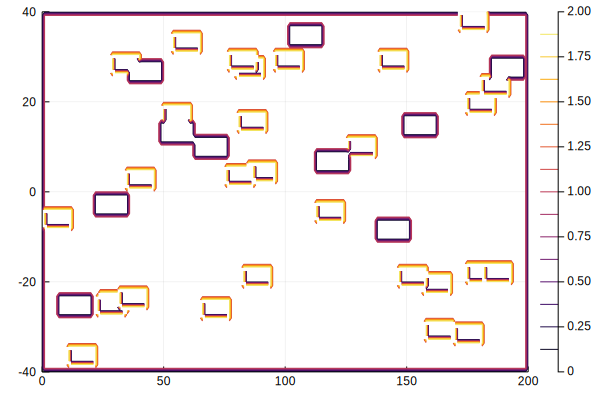

In [22]:
#Definir Ω

Ω = ones(M-2,N-2)
Ω = rodear(Ω,0)
Block2 = rodear(zeros(4,10),2)
Block0 = zeros(6,14)

for i in 1:30
    a,b = rand(1:M-5),rand(1:N-12)
    Ω[a:a+5,b:b+11] = Block2
end

for i in 1:10
    a,b = rand(1:M-5),rand(1:N-13)
    Ω[a:a+5,b:b+13] = Block0
end

plot(X,Y,Ω)

In [23]:
#generar trayectoria XT

x(t) = [mod(0.8*t,200),0]
X1 = []
for i in 1:n+1
    push!(X1, x(i-1))
end
XT = [X1];

In [29]:
#Calculo de U para R = [1.0,0.9,0.8]
R = [1.0, 0.9,0.8,0.6]
Analisis = []
for i in R
    UU = difusion(u,Ω,X,Y,D,h,XT,i,n);
    push!(Analisis,[i,UU[n],u_punto_xy(UU,40,100),distribucion_t(UU,n)])
end

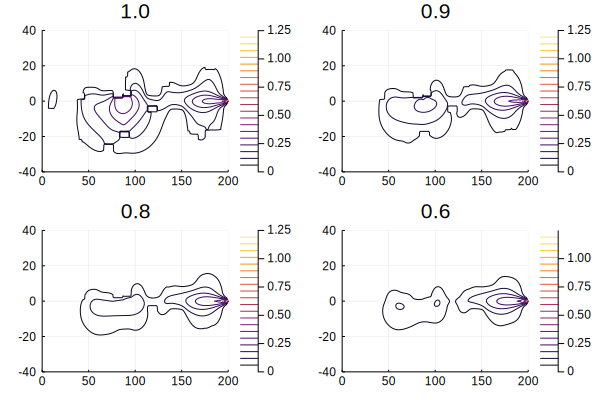

In [30]:
plot(
    plot(X,Y,Analisis[1][2],title = "1.0",levels=20),
    plot(X,Y,Analisis[2][2],title = "0.9",levels=20),
    plot(X,Y,Analisis[3][2],title = "0.8",levels=20),
    plot(X,Y,Analisis[4][2],title = "0.6",levels=20),
    )

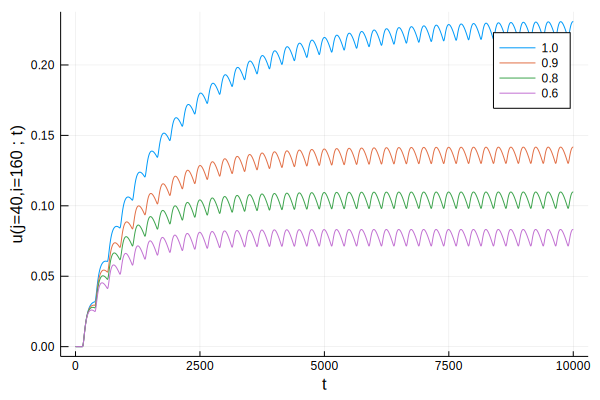

In [31]:
plot( Analisis[1][3], label="1.0")
plot!(Analisis[2][3], label="0.9")
plot!(Analisis[3][3], label="0.8")
plot!(Analisis[4][3], label="0.6")
plot!(ylabel= "u(j=40,i=160 ; t)", xlabel="t")

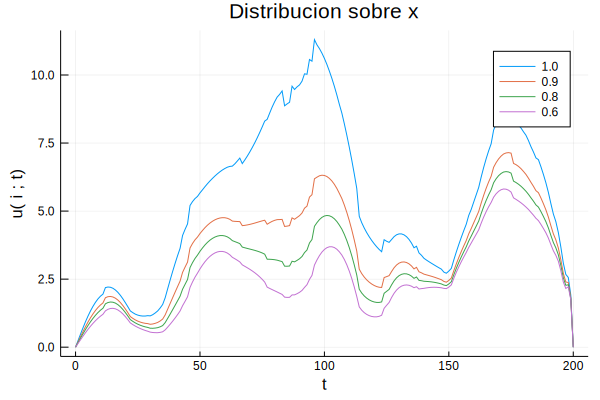

In [32]:
plot( X, Analisis[1][4][1], label="1.0")
plot!(X, Analisis[2][4][1], label="0.9")
plot!(X, Analisis[3][4][1], label="0.8")
plot!(X, Analisis[4][4][1], label="0.6")
plot!(title="Distribucion sobre x", ylabel= "u( i ; t)", xlabel="t")

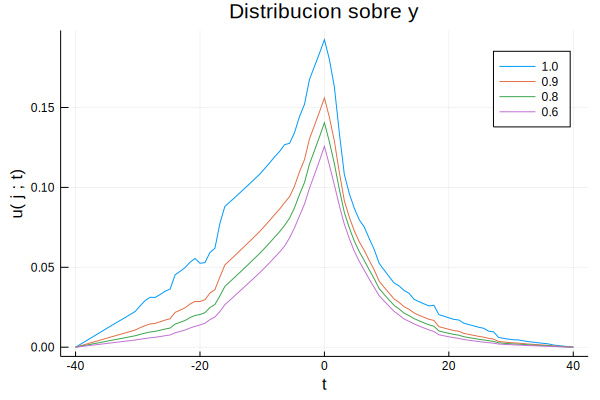

In [33]:
plot( Y, Analisis[1][4][2], label="1.0")
plot!(Y, Analisis[2][4][2], label="0.9")
plot!(Y, Analisis[3][4][2], label="0.8")
plot!(Y, Analisis[4][4][2], label="0.6")
plot!(title="Distribucion sobre y", ylabel= "u( j ; t)", xlabel="t")

## Notas

Observemos en las gráficas de difusión que las paredes parcialmente reflejantes sí afectan significativamente los niveles de contaminantes $u(x,t)$.

De la segunda gráfica; dado un nodo (j,i) existe un tiempo de equilibrio $\textbf{t_e}$ tal que para todo $t>t_e$ los valores de $u(j,i,t)$ se encuentran dentro de un intervalo.

Distribución sobre x nos regresa información del espacio en la dirección paralela al movimiento de los agentes. Así hay valores menores donde hay mayor número de fronteras absorbentes y valores mayores para las f. reflejantes.

Distribución en y nos dice como se difunde $u$ en la dirección perpendicular al movimiento. Esto posteriormente se utilizara para calcular la cantidad de contaminantes a cualquier distancia de una calle transitada bajo una red de calles real.

## Prueba 5

Calle de 300 metros de largo y 20 de ancho; una calle perpendicular intermedia.

Los agentes se encuentran en 16 metros intermedios y van en sentidos y velocidades aleatorios.


In [34]:
N,M =201,31
X = linspace(0,300,N)
Y = linspace(-10,10,M)
Q = zeros(M,N)
h = 1.0
D = 0.15

u = zeros(M,N)
U = u
UU = []

k,l = X[2]-X[1], Y[2]-Y[1]
@show h <= k^2*l^2/(2*D*(k^2 +l^2)), h, k^2*l^2/(2*D*(k^2 +l^2))

n = 7000 #iteraciones
Num = 15   # num agentes

(h <= (k ^ 2 * l ^ 2) / (2 * D * (k ^ 2 + l ^ 2)), h, (k ^ 2 * l ^ 2) / (2 * D * (k ^ 2 + l ^ 2))) = (true, 1.0, 1.2371134020618537)


15

In [35]:
#Generamos la matriz XT que contiene las trayectorias de cada agente

x(t,v,y) = [mod(v*t,300),y]
XT = []
for j in 1:Num
    y = rand(-5:5)
    v = (5*rand(1)[1]+10)*rand([-1,1])
    X1 = []
    for i in 1:n
        push!(X1,x(i*h,v,y))
    end
    push!(XT,X1)
end

In [36]:
Ω = rodear(ones(M-2,N-2),0)
Ω[1,:].=2
Ω[M,:].=2;

Ω[1,100:110].=0
Ω[M,100:110].=0;
#plot(X,Y,Ω)

In [37]:
UU = difusion(u,Ω,X,Y,D,h,XT,0.8,n);

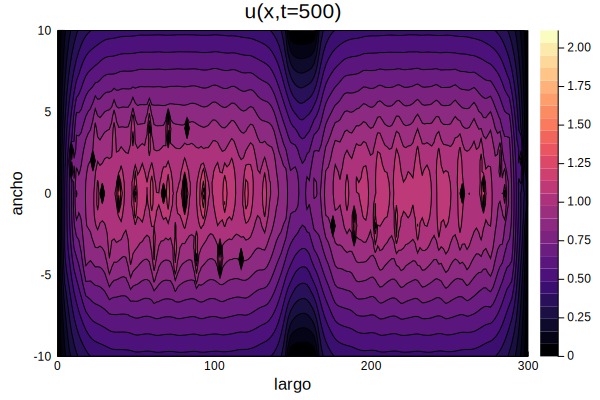

In [38]:
plot(X,Y,UU[5000],fill=true,levels=25,color=:magma)
plot!(title="u(x,t=500)",xlabel="largo", ylabel="ancho")


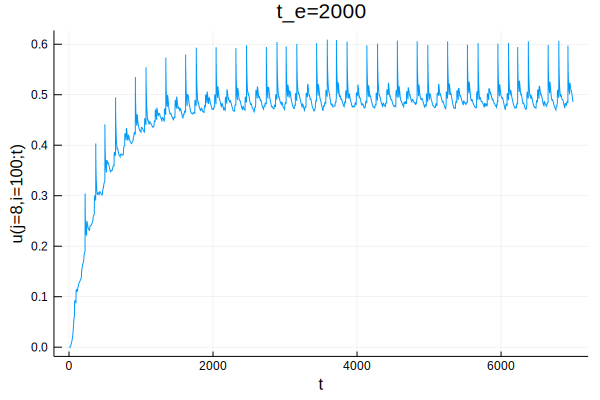

In [44]:
plot(u_punto_xy(UU,8,100))
plot!(title="t_e=2000",xlabel="t", ylabel="u(j=8,i=100;t)",leg=false)

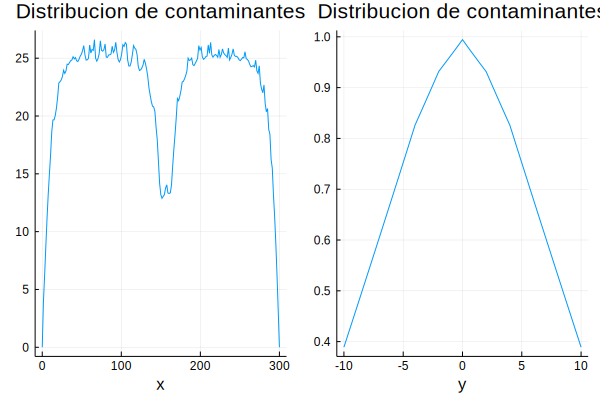

In [45]:
plot(
    plot(X,distribucion_t(UU,n)[1], xlabel ="x"),
    plot(Y,distribucion_t(UU,n)[2], xlabel ="y"),
    leg=false, title="Distribucion de contaminantes")

mean((u_punto_xy(UU, 8, 100))[2000:7000]) = 0.4925902563338968


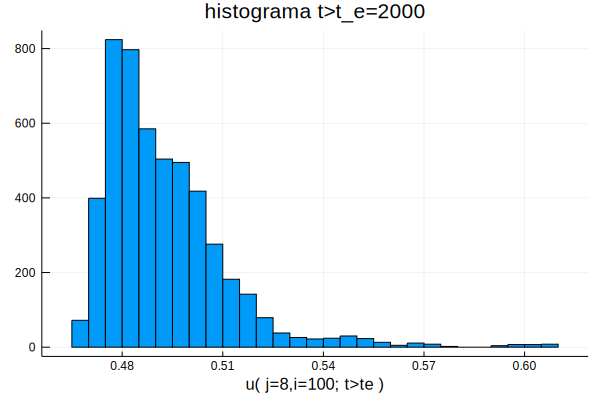

In [46]:
@show mean(u_punto_xy(UU,8,100)[2000:7000])
histogram(u_punto_xy(UU,8,100)[2000:7000]) 
plot!(title="histograma t>t_e=2000",xlabel="u( j=8,i=100; t>te )",leg=false)

using MAT
file = matopen("P5.mat", "w")
write(file, "UU", UU)
close(file)